<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0416Thu_IMDB_Movid_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_gpu==2.0

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
     |████████████████████████████████| 450kB 50.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0556535e69bdd3646ef621170674351f6c55218f313772ea0abb90b3ebc952a1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstal

In [2]:
pip install keras==2.3.1

#### IMDB 데이터셋 로드하기
* num_words = 10000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개만 사용
* 드물게 나타나는 단어는 무시
* 단어의 긍정, 부정 여부를 판단
* 부정 : 0 , 긍정 : 1

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스는 9999을 넘지 않는다.

In [8]:
max([max(sequence) for sequence in train_data])

9999

리뷰 데이터 하나를 원래 영어 단어로 바꾸는 방법

In [9]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] # 정수 인덱스와 단어 를 매핑하도록 뒤집기
 )

# 리뷰를 디코딩한다. 0,1,2 는 '패딩', 문서 시작' '사전에 없음'을 위한 인덱스 이므로 3을 뺀다.
decode_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


#### 데이터 준비 
* 신경망에 숫자 리스트를 주입은 x 
* 리스트를 텐서로 바꾸는 두 가지 방법


정수 시퀀스를 이진 행렬로 인코딩하기

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequenchs), dimension) 이고 모든 원소가
                                                   # 0인 행렬로 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환한다.

다음과 같은 샘플이 낭고, 레이블은 쉽게 벡터로 변경이 가능하다.

In [21]:
print (x_train[0])
print (x_test[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]



#### 모델 정의하기



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

모델 컴파일하기

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

옵티마이저 설정하기


In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

손실과 측정을 함수 객체로 지정하기

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### 훈련 검증

3-7 코드 검증 세트 준비하기

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

3-8 모델 훈련하기

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.5268 - acc: 0.7841 - val_loss: 0.3945 - val_acc: 0.8711
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3117 - acc: 0.9010 - val_loss: 0.3257 - val_acc: 0.8759
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2274 - acc: 0.9254 - val_loss: 0.2791 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1773 - acc: 0.9407 - val_loss: 0.2906 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1412 - acc: 0.9550 - val_loss: 0.2949 - val_acc: 0.8845
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1190 - acc: 0.9630 - val_loss: 0.3058 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0999 - acc: 0.9700 - val_loss: 0.3099 - val_ac

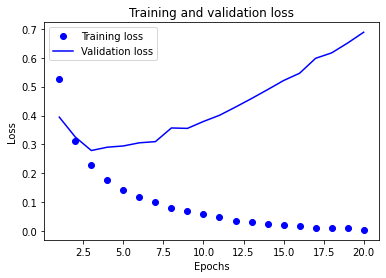

In [31]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

3-10 훈련과 검증 정확도 그리기

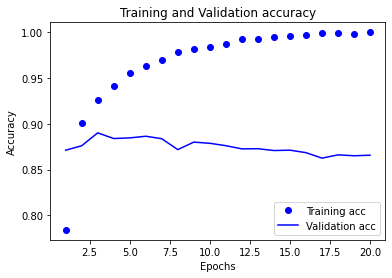

In [34]:
plt.clf() # 그래프를 초기화한다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()